In [1]:
from keras.initializers import RandomUniform
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Conv1D
from keras import optimizers
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import keras

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, MinMaxScaler
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline
plt.rcParams["figure.figsize"]=[9,6]

Using TensorFlow backend.


In [2]:
X = np.loadtxt('features1.txt')
# Y = np.loadtxt('one_hot_labels.txt')
Y = np.loadtxt('labels1.txt')
X_test = np.loadtxt('test_features.txt')
X.dtype, Y.dtype

(dtype('float64'), dtype('float64'))

In [3]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

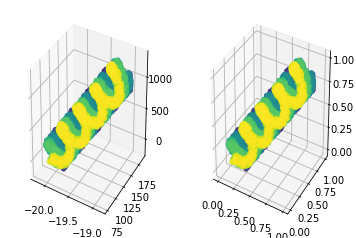

In [4]:
cm = plt.get_cmap('viridis')
col = [cm(float(i)/(len(X))) for i in range(len(X))]
fig = plt.figure()
ax3D = fig.add_subplot(121, projection='3d')
ax3D.scatter(X.T[0], X.T[1], X.T[2], s=10, c=col, marker='o')  
ax3D = fig.add_subplot(122, projection='3d')
ax3D.scatter(X_scaled.T[0], X_scaled.T[1], X_scaled.T[2], s=10, c=col, marker='o')  
plt.show()

In [5]:
X_train, X_val, Y_train, Y_val = train_test_split(X_scaled, Y, test_size=0.25, random_state=7)

In [6]:
Y_train_ints = Y_train.copy()
Y_val_ints = Y_val.copy()

In [7]:
Y_train = to_categorical(Y_train, 4)
Y_val = to_categorical(Y_val, 4)

In [8]:
X_train.shape, X_val.shape, Y_train.shape, Y_val.shape, X_test.shape

((15000, 3), (5000, 3), (15000, 4), (5000, 4), (8000, 3))

In [23]:
batch_size = 1024
epochs = 200
lr = 1.5e-3

In [24]:
initializer = RandomUniform(minval=-0.2, maxval=0.2, seed=7)

In [25]:
def baseline(entries, exits, lr, neurons, initalizer):
    model = Sequential()
    model.add(Dense(neurons, input_shape = (3,), 
                    kernel_initializer=initalizer, activation='relu'))
    model.add(Dense(neurons*2, 
                    kernel_initializer=initalizer, activation='relu'))
    model.add(Dense(neurons*2, 
                    kernel_initializer=initalizer, activation='relu'))
    model.add(Dense(neurons*2, 
                    kernel_initializer=initalizer, activation='relu'))
    model.add(Dense(neurons*2, 
                    kernel_initializer=initalizer, activation='relu'))
    model.add(Dense(neurons*2, 
                    kernel_initializer=initalizer, activation='relu'))
    model.add(Dense(neurons, 
                    kernel_initializer=initalizer, activation='relu'))
    model.add(Dense(neurons, 
                    kernel_initializer=initalizer, activation='relu'))
    model.add(Dense(neurons, 
                    kernel_initializer=initalizer, activation='relu'))
    model.add(Dense(exits, activation='softmax'))
    sgd = optimizers.Adam(lr=lr, decay=lr*2e-3)
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [26]:
model = baseline(3, 4, lr, 256, initializer)

In [27]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 256)               1024      
_________________________________________________________________
dense_12 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_13 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_14 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_15 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_16 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_17 (Dense)             (None, 256)               131328    
__________

In [28]:
%%time
history = model.fit(
    X_train, 
    Y_train, 
    validation_data=(X_val, Y_val), 
    epochs=epochs, 
    batch_size=batch_size, 
    verbose=1
)

Train on 15000 samples, validate on 5000 samples
Epoch 1/200
15000/15000 [==============================] - 3s 197us/step - loss: 4.6492 - acc: 0.2555 - val_loss: 2.2691 - val_acc: 0.2492
Epoch 2/200
15000/15000 [==============================] - 1s 82us/step - loss: 1.5702 - acc: 0.2614 - val_loss: 1.4002 - val_acc: 0.2846
Epoch 3/200
15000/15000 [==============================] - 1s 81us/step - loss: 1.3767 - acc: 0.2790 - val_loss: 1.3720 - val_acc: 0.2796
Epoch 4/200
15000/15000 [==============================] - 1s 81us/step - loss: 1.3427 - acc: 0.2957 - val_loss: 1.3215 - val_acc: 0.3176
Epoch 5/200
15000/15000 [==============================] - 1s 84us/step - loss: 1.3054 - acc: 0.3174 - val_loss: 1.2948 - val_acc: 0.3392
Epoch 6/200
15000/15000 [==============================] - 1s 93us/step - loss: 1.2615 - acc: 0.3511 - val_loss: 1.2540 - val_acc: 0.3534
Epoch 7/200
15000/15000 [==============================] - 1s 79us/step - loss: 1.2210 - acc: 0.3683 - val_loss: 1.2277 - 

15000/15000 [==============================] - 1s 82us/step - loss: 0.3832 - acc: 0.8202 - val_loss: 0.4214 - val_acc: 0.8058
Epoch 60/200
15000/15000 [==============================] - 1s 81us/step - loss: 0.5321 - acc: 0.7665 - val_loss: 0.5422 - val_acc: 0.7484
Epoch 61/200
15000/15000 [==============================] - 1s 81us/step - loss: 0.5006 - acc: 0.7656 - val_loss: 0.4824 - val_acc: 0.7714
Epoch 62/200
15000/15000 [==============================] - 1s 82us/step - loss: 0.4012 - acc: 0.8142 - val_loss: 0.3896 - val_acc: 0.8208
Epoch 63/200
15000/15000 [==============================] - 1s 81us/step - loss: 0.3567 - acc: 0.8345 - val_loss: 0.3484 - val_acc: 0.8348
Epoch 64/200
15000/15000 [==============================] - 1s 81us/step - loss: 0.3383 - acc: 0.8384 - val_loss: 0.3472 - val_acc: 0.8358
Epoch 65/200
15000/15000 [==============================] - 1s 81us/step - loss: 0.4109 - acc: 0.8112 - val_loss: 0.4073 - val_acc: 0.8134
Epoch 66/200
15000/15000 [==============

Epoch 118/200
15000/15000 [==============================] - 1s 81us/step - loss: 0.3141 - acc: 0.8455 - val_loss: 0.3481 - val_acc: 0.8326
Epoch 119/200
15000/15000 [==============================] - 1s 81us/step - loss: 0.3089 - acc: 0.8479 - val_loss: 0.4329 - val_acc: 0.8028
Epoch 120/200
15000/15000 [==============================] - 1s 81us/step - loss: 0.3506 - acc: 0.8321 - val_loss: 0.3343 - val_acc: 0.8380
Epoch 121/200
15000/15000 [==============================] - 1s 81us/step - loss: 0.3016 - acc: 0.8493 - val_loss: 0.3745 - val_acc: 0.8186
Epoch 122/200
15000/15000 [==============================] - 1s 81us/step - loss: 0.3213 - acc: 0.8427 - val_loss: 0.3193 - val_acc: 0.8468
Epoch 123/200
15000/15000 [==============================] - 1s 81us/step - loss: 0.3171 - acc: 0.8453 - val_loss: 0.3416 - val_acc: 0.8366
Epoch 124/200
15000/15000 [==============================] - 1s 82us/step - loss: 0.3080 - acc: 0.8481 - val_loss: 0.3205 - val_acc: 0.8426
Epoch 125/200
15000/

15000/15000 [==============================] - 1s 82us/step - loss: 0.3050 - acc: 0.8507 - val_loss: 0.3105 - val_acc: 0.8418
Epoch 177/200
15000/15000 [==============================] - 1s 82us/step - loss: 0.3061 - acc: 0.8487 - val_loss: 0.3367 - val_acc: 0.8328
Epoch 178/200
15000/15000 [==============================] - 1s 80us/step - loss: 0.3103 - acc: 0.8477 - val_loss: 0.3232 - val_acc: 0.8368
Epoch 179/200
15000/15000 [==============================] - 1s 79us/step - loss: 0.2988 - acc: 0.8508 - val_loss: 0.4353 - val_acc: 0.8042
Epoch 180/200
15000/15000 [==============================] - 1s 82us/step - loss: 0.3157 - acc: 0.8478 - val_loss: 0.3296 - val_acc: 0.8406
Epoch 181/200
15000/15000 [==============================] - 1s 81us/step - loss: 0.2854 - acc: 0.8570 - val_loss: 0.3046 - val_acc: 0.8420
Epoch 182/200
15000/15000 [==============================] - 1s 81us/step - loss: 0.2962 - acc: 0.8529 - val_loss: 0.3590 - val_acc: 0.8330
Epoch 183/200
15000/15000 [=======

In [29]:
scores = model.evaluate(X_val, Y_val, verbose=0)
print('Val accuracy:', scores[1])
print('Val loss', scores[0])

Val accuracy: 0.8374
Val loss 0.3271672665834427


In [30]:
unique, counts = np.unique(np.argmax(Y_train, axis=1), return_counts=True)
dict(zip(unique, counts))

{0: 3821, 1: 3754, 2: 3679, 3: 3746}

In [31]:
prediction = model.predict(X_test_scaled)
predicted = np.argmax(prediction, axis=1)

In [32]:
unique, counts = np.unique(predicted, return_counts=True)
dict(zip(unique, counts))

{0: 1967, 1: 1967, 2: 1984, 3: 2082}

In [33]:
prediction[:10]

array([[9.9999952e-01, 3.9515393e-07, 1.5310015e-11, 1.4996937e-07],
       [7.6529122e-04, 1.1508564e-04, 1.6733074e-01, 8.3178884e-01],
       [2.1512000e-04, 2.1850678e-06, 3.4303740e-02, 9.6547890e-01],
       [3.4254190e-04, 4.8874944e-01, 5.1041788e-01, 4.9003639e-04],
       [3.7666681e-04, 8.0882937e-01, 1.9060677e-01, 1.8716151e-04],
       [8.2646376e-01, 1.7352490e-01, 1.9506840e-07, 1.1123464e-05],
       [1.3582410e-01, 8.6414087e-01, 3.3182321e-05, 1.8475746e-06],
       [9.8908442e-01, 1.7634672e-03, 1.7487086e-05, 9.1346670e-03],
       [6.8635746e-09, 4.8059039e-05, 9.9953628e-01, 4.1567863e-04],
       [5.9330821e-01, 4.0513563e-01, 8.5619855e-04, 6.9992739e-04]],
      dtype=float32)

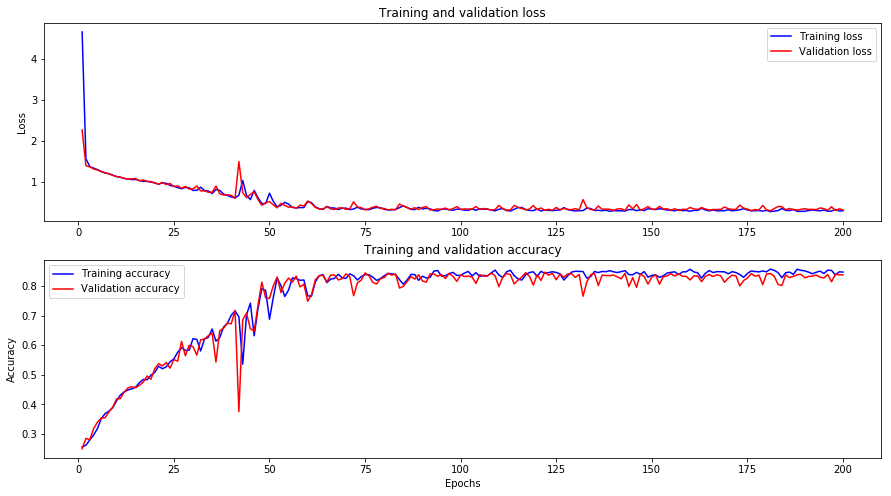

In [34]:
epochs_list = range(1, len(history.history['loss']) + 1)
plt.figure(figsize=(15,8))
plt.subplot(211)
plt.plot(epochs_list, history.history['loss'], 'b', label='Training loss')
plt.plot(epochs_list, history.history['val_loss'], 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('Loss')
plt.legend()

plt.subplot(212)
plt.plot(epochs_list, history.history['acc'], 'b', label='Training accuracy')
plt.plot(epochs_list, history.history['val_acc'], 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [35]:
np.savetxt('prediction_keras.txt', predicted.astype(int))

In [36]:
torch_results = np.loadtxt('prediction_torch.txt')

In [37]:
torch_results.shape

(8000,)

In [38]:
unique, counts = np.unique(torch_results, return_counts=True)
dict(zip(unique, counts))

{0.0: 2025, 1.0: 1927, 2.0: 2244, 3.0: 1804}

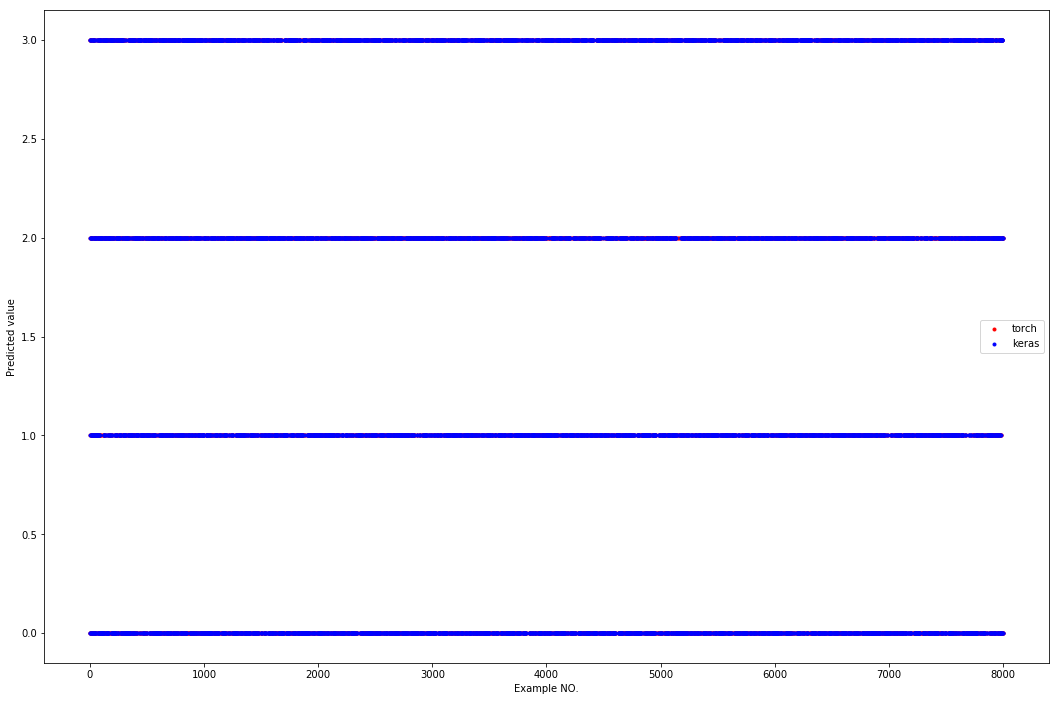

In [39]:
plt.figure(figsize=(18,12))
plt.plot(torch_results, 'r.', label='torch')
plt.plot(predicted, 'b.', label='keras')
plt.legend()
plt.xlabel('Example NO.')
plt.ylabel('Predicted value')
plt.show()

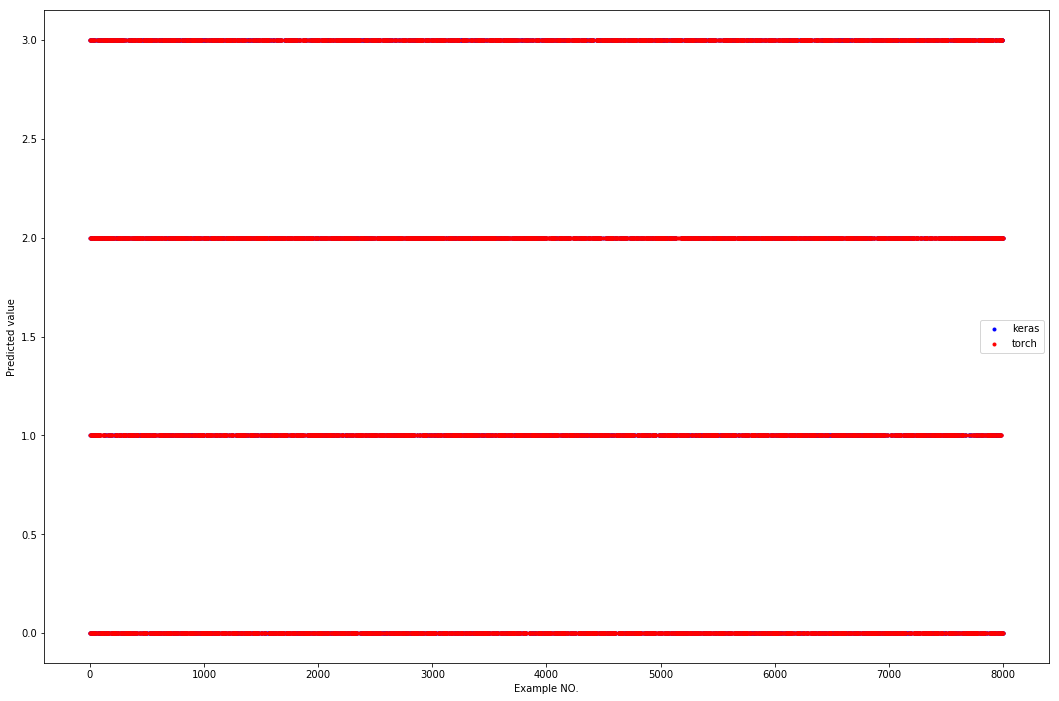

In [40]:
plt.figure(figsize=(18,12))
plt.plot(predicted, 'b.', label='keras')
plt.plot(torch_results, 'r.', label='torch')
plt.legend()
plt.xlabel('Example NO.')
plt.ylabel('Predicted value')
plt.show()

In [41]:
counter = 0
for i in range(len(predicted)):
    if predicted[i] == torch_results[i]:
        counter += 1
print("Percentage of same predictions", counter / len(predicted), "\nNO. of same predictions", counter)

Percentage of same predictions 0.89475 
NO. of same predictions 7158
